Importing Necessary Modules

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np



Loading the Datasets

In [4]:
test_set = pd.read_csv('imageRecognition/mnist_test.csv')
train_set = pd.read_csv('imageRecognition/mnist_train.csv') 

Familiarizing with the Datasets

In [6]:
print(test_set)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [10]:
print(train_set)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

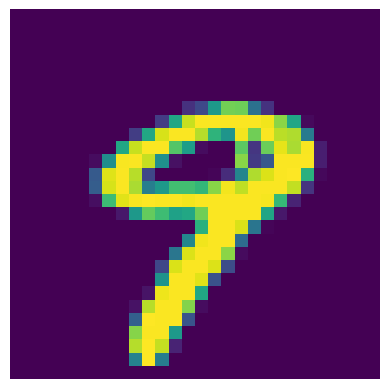

9


In [18]:
row_index = 9  

image_pixel_values = test_set.iloc[row_index, 1:] 

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_set.iloc[row_index,0])

Spliting Images and Labels in Train and Test Sets

In [25]:
train_x = np.array([train_set.iloc[i,1:] for i in range(len(train_set.iloc[:,0]))])
train_y = np.array([train_set.iloc[i,0] for i in range(len(train_set.iloc[:,0]))])
test_x = np.array([test_set.iloc[i,1:] for i in range(len(test_set.iloc[:,0]))])
test_y = np.array([test_set.iloc[i,0] for i in range(len(test_set.iloc[:,0]))])

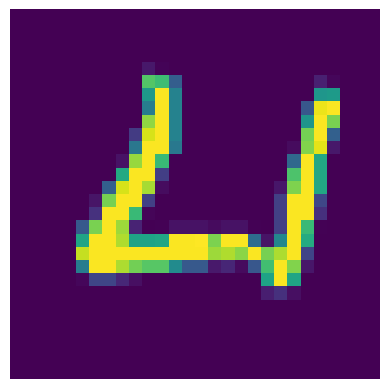

4


In [33]:
# Extract the pixel values for the chosen image
image_pixel_values = test_x[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array)  
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_y[33])

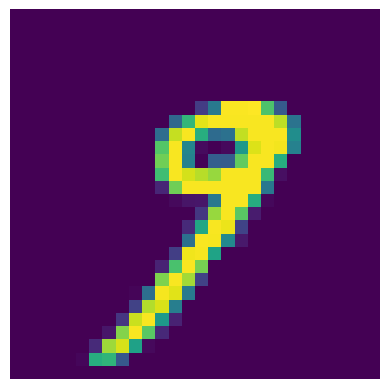

9


In [34]:
# Extract the pixel values for the chosen image
image_pixel_values = train_x[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(train_y[33])

Train the Model 

In [ ]:
import tensorflow as tf

